# Banking customer churn prediction

1. **Domain Exploration**
    - understanding the business process, understand the data sources
    - understand common beleifs with in the business
    

2. **Data Collection and Data Exploration**
    - collect data from multiple sources
    - form a dataset, perform generic exploration to understand data quality


3. **Data Cleaning**
    - Handle duplicate entries
    - Handle unwanted cols
    - Handling missing values
    - Handling outliers


4. **Feature Engineering**
    - Feature Extraction
    - Feature Selection
        - **Data VIsualization**
            - Univariate analysis
            - Bivariate analysis
            - Multivarite analysis

        - **Statistical Research**
            - Correlation Analysis
            - ANOVA
            - Chi Square

5. **Preprocessing features**
    - Encoding
    - Normalization
    - train test split
    
6. Apply Machine Learning -
    - choose the appropriate algorithm, develop a predictive model
    
7. Performance ANalysis
8. Optimization & Tuning
9. Deploy the model to production
10. Monitor the performance in production

## 2. Data Collection & Data exploration

In [ ]:
!pip install plotly

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observations**
    
    - RowNumber, CustomerId, Surname are unwanted columns
    - Bank is operational from last 10 years
    - 25% of the customers have 0 balance in their account
    - almost half of the customesr in the bank are not active members

## 3. Data Cleaning

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# drop unwanted cols - rownumber, customerid,surname
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [12]:
df.fillna(df.mean(),inplace=True)
# check for missing values
df.isnull().sum()

<ipython-input-12-d12a1d4c6b5e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# check for outliers
df.skew()

<ipython-input-13-6b4f4795c47f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 4}. Feature Engineering 
#### Exploraotry Data Analysis
##### Univariate Analysis
    - analysing one variable at a time
    - Numeric - continous frequency distribution - histogram
    - categorical - discrete frequency distribution - barplot

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [40]:
for col in nums:
    fig = px.histogram(df,x=col,width=1000,height=350)
    fig.show()

In [46]:
for col in cats:
    fig = px.histogram(df,x=col,width=1000,height=350)
    fig.show()

**Observations**
    
    - Age has slight outliers present
    - approx 36 % of customers have 0 balance, rest customers have balance approx higher than 100k
    - approx 95% of customers have either 1 or 2 products
    - Salary and tenure has almost uniform distribution
    - approx 50% of customers are from france, rest from germany and spain
    - approx 70% of customers have creditcard
    - almost 48% of customers are not actively using bank accounts
    - approx 20% of customers left the bank

### Bivariate Analysis
    - numeric vs numeric - scatterplot
    - numeric vs categorical - distplot
    - categorical vs categorical - barplot

In [ ]:
df.columns

In [15]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

##### Numeric vs categorical

In [13]:
import plotly.figure_factory as ff

In [ ]:
for col in nums:
    data = [df[col][df.Exited==0],df[col][df.Exited==1]]
    fig = ff.create_distplot(data,['Exited = 0','Exited = 1'])
    fig.update_layout(title_text = "graph for "+col)
    fig.show()

**Observations**
  
      - Creditscore does not seem to have sufficient information to say why customers are exiting.
      - There is higher density of customers leaving for age>40 compared to age<40
      - customers with high balance have more chances of leaving
      - customers with numofproducts=2 are leaving lesser compared to customers with numofproducts=1


##### Categorical vs categorical

In [20]:
for col in cats:
    print(col)
    pivot = pd.crosstab(df[col],df.Exited,margins=True)
    print(pivot,'\n')
    print(pivot[1]/pivot['All'],'\n','\n')

Geography
Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000 

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64 
 

Gender
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000 

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64 
 

HasCrCard
Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000 

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64 
 

IsActiveMember
Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000 

IsActiveMember
0      0.268509
1      0.142691
All    0.203700

**Observations**
  
      - significantly impacting factors are - age, Numberofproducts, Geography, Gender, IsActiveMember

### Multivariate Analysis
    - numeric vs numeric vs categorical - scatterplot

In [21]:
fig = px.scatter(df,x="Age",y="CreditScore",color="Exited")
fig.show()

In [ ]:
fig = px.scatter(df,x="Age",y="Balance",color="Exited")
fig.show()

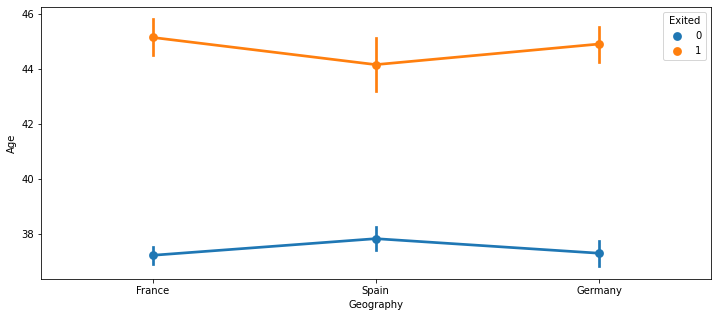

In [19]:
# categorical v/s numeric vs categorical
# Geogrpahy v/s age v/s Exited
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

In [28]:
fig = px.parallel_coordinates(df[['Age','Balance','NumOfProducts','Exited']].sample(1000,axis=0),color='Exited')
fig.show()

### Statistical Research
#### Correlation Analysis

In [15]:
import seaborn as sns

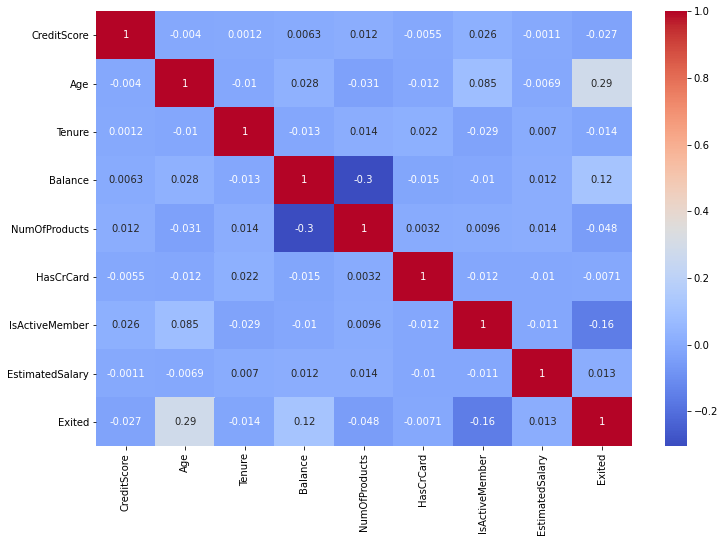

In [17]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

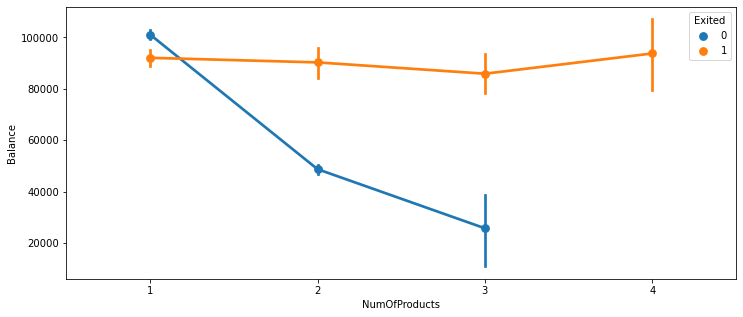

In [20]:
plt.figure(figsize=(12,5))
sns.pointplot(x='NumOfProducts',y='Balance',hue='Exited',data=df)
plt.show()

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
# extracting important features
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']

In [14]:
x.head(8)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0


## 5. Preprocessing of features
    - As geography and gender are in string format, we need to encode those features
    - we can use Onehotencoder to encode the features

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first',sparse=False),[1,2])],remainder='passthrough')
transformer.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [1, 2])])

In [16]:
x2 = transformer.transform(x)
pd.DataFrame(x2).head(8)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,619.0,42.0,0.00,1.0,1.0
1,0.0,1.0,0.0,608.0,41.0,83807.86,1.0,1.0
2,0.0,0.0,0.0,502.0,42.0,159660.80,3.0,0.0
3,0.0,0.0,0.0,699.0,39.0,0.00,2.0,0.0
4,0.0,1.0,0.0,850.0,43.0,125510.82,1.0,1.0
5,0.0,1.0,1.0,645.0,44.0,113755.78,2.0,0.0
6,0.0,0.0,1.0,822.0,50.0,0.00,2.0,1.0
7,1.0,0.0,0.0,376.0,29.0,115046.74,4.0,0.0


In [17]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=5,stratify=y)
print(x2.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


## 6. Applying ML - Decision Tree

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
#train the model using train dataset - xtrain,ytrain
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

## 7. Performance Analysis

In [20]:
from sklearn import metrics

In [21]:
print("Performance of model on test data ")
ypred = model.predict(xtest)
print("Accuracy ",metrics.accuracy_score(ytest,ypred))
print("Recall ",metrics.recall_score(ytest,ypred))
print("Precision ",metrics.precision_score(ytest,ypred))
print("F1 Score ",metrics.f1_score(ytest,ypred))

Performance of model on test data 
Accuracy  0.8105
Recall  0.538083538083538
Precision  0.5341463414634147
F1 Score  0.5361077111383109


In [24]:
metrics.confusion_matrix(ytest,ypred)

array([[1402,  191],
       [ 188,  219]], dtype=int64)

In [25]:
print("Performance of model on train data ")
ypred = model.predict(xtrain)
print("Accuracy ",metrics.accuracy_score(ytrain,ypred))
print("Recall ",metrics.recall_score(ytrain,ypred))
print("Precision ",metrics.precision_score(ytrain,ypred))
print("F1 Score ",metrics.f1_score(ytrain,ypred))

Performance of model on train data 
Accuracy  0.999625
Recall  0.998159509202454
Precision  1.0
F1 Score  0.9990789069696039


### COntrolling overfitting

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=20,min_samples_split=60,
                                   random_state=5)
#train the model using train dataset - xtrain,ytrain
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       min_samples_split=60, random_state=5)

## 7. Performance Analysis

In [27]:
from sklearn import metrics

In [28]:
print("Performance of model on test data ")
ypred = model.predict(xtest)
print("Accuracy ",metrics.accuracy_score(ytest,ypred))
print("Recall ",metrics.recall_score(ytest,ypred))
print("Precision ",metrics.precision_score(ytest,ypred))
print("F1 Score ",metrics.f1_score(ytest,ypred))

Performance of model on test data 
Accuracy  0.865
Recall  0.48402948402948404
Precision  0.7665369649805448
F1 Score  0.5933734939759037


In [29]:
metrics.confusion_matrix(ytest,ypred)

array([[1533,   60],
       [ 210,  197]], dtype=int64)

In [30]:
print("Performance of model on train data ")
ypred = model.predict(xtrain)
print("Accuracy ",metrics.accuracy_score(ytrain,ypred))
print("Recall ",metrics.recall_score(ytrain,ypred))
print("Precision ",metrics.precision_score(ytrain,ypred))
print("F1 Score ",metrics.f1_score(ytrain,ypred))

Performance of model on train data 
Accuracy  0.868125
Recall  0.5171779141104295
Precision  0.7587758775877588
F1 Score  0.6151039766508574


### Hyperparameter tuning using gridsearch

In [31]:
params = {'max_depth':np.arange(5,15,1),
          'min_samples_leaf':np.arange(5,50,5),
          'min_samples_split':np.arange(30,120,10)}
params

{'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
 'min_samples_split': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110])}

In [33]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(tree.DecisionTreeClassifier(random_state=5),param_grid=params,scoring='f1',verbose=True,
                     n_jobs=-1)
search.fit(x2,y)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110])},
             scoring='f1', verbose=True)

In [34]:
search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=100,
                       random_state=5)

In [35]:
search.best_score_

0.58840030332766

## Overfitting v/s Underfitting

### Overfitting
    - performance of model on train data = high
    - performance of model on test data = low
    
#### Why overfitting occurs?
    - presence of noisy features, outliers, unwanted columns
    - the current learning algorithm is more complex
    - lack of training data
    
#### How to deal with overfitting?
    - drop some slighly less important columns / drop unwanted columns
    - collect more data - collect more rows, no need to get more columns
    - try a slighly less complex learning algorithm
    - control hyperparameters, in case of decision tree decrease the value of max depth, increase value of min_samples_leaf and min_samples_split
    
    
    
### underfitting
    - performance of model on train data = low
    - performance of model on test data = low
    
#### Why underfitting occurs?
    - lack of important features
    - the current learning algorithm is less effective
    - lack of training data - columns
    
#### How to deal with underfitting?
    - drop some rows having outliers
    - collect more data - collect more columns, no need to get more rows
    - try a slighly more complex learning algorithm
    - control hyperparameters, in case of decision tree increase the value of max depth, decrease value of min_samples_leaf and min_samples_split


In [36]:
# mac users = pip install graphviz

# windows users - pip install graphviz
# install the executable - https://graphviz.org/download/

### Visualizing the tree

In [45]:
import os
os.environ['PATH'] += os.pathsep+ "C:\Program Files (x86)\Graphviz2.38\bin"

In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=20,min_samples_split=100,
                                   random_state=5)
#train the model using train dataset - xtrain,ytrain
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       min_samples_split=100, random_state=5)

In [40]:
feature_names = ['Germany','Spain','Male', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']
cnames = ['Not Exited','Exited']

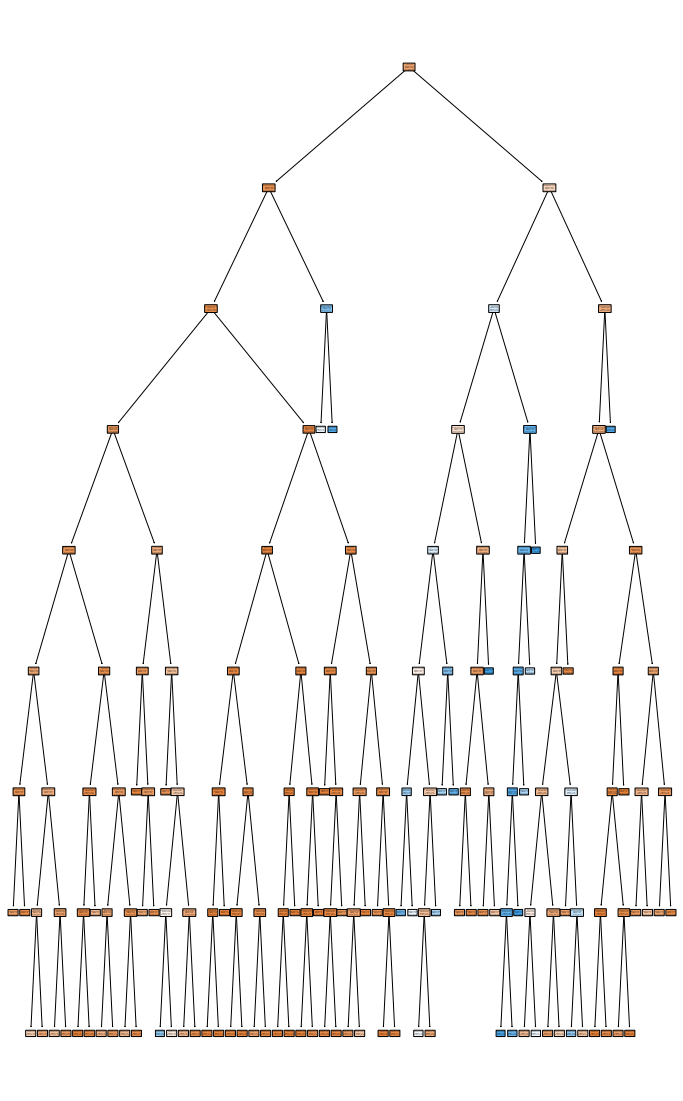

In [44]:
plt.figure(figsize=(12,20))
tree.plot_tree(model,feature_names=feature_names,class_names=cnames,rounded=True,filled=True)
plt.show()

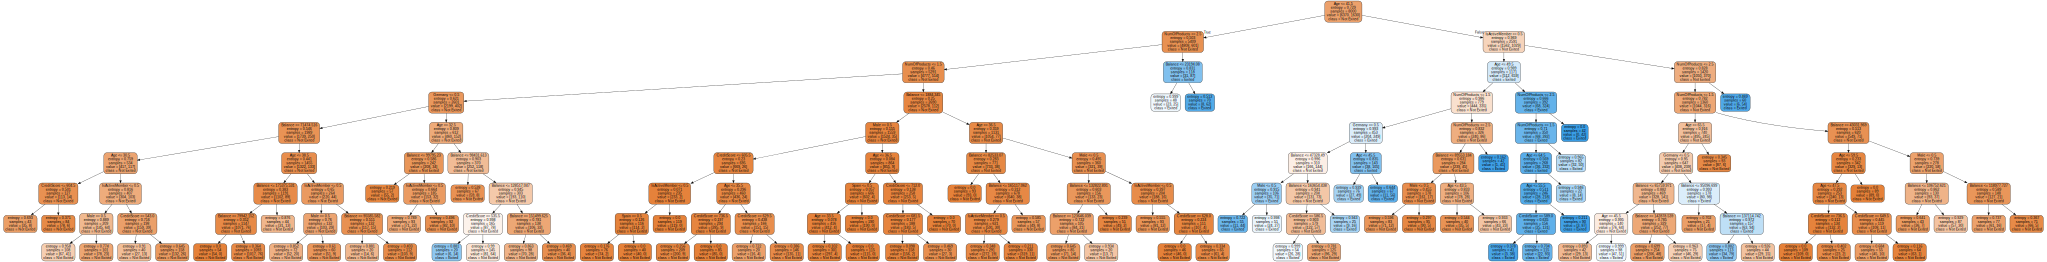

In [43]:
graphdata = tree.export_graphviz(model,feature_names=feature_names,class_names=cnames,
                                rounded=True,filled=True)
import graphviz
graph = graphviz.Source(graphdata)
graph

# Random FOrest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=500,max_depth=10,min_samples_leaf=50,random_state=5)
model2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, n_estimators=500,
                       random_state=5)

In [50]:
print("Performance of model on test data ")
ypred = model2.predict(xtest)
print("Accuracy ",metrics.accuracy_score(ytest,ypred))
print("Recall ",metrics.recall_score(ytest,ypred))
print("Precision ",metrics.precision_score(ytest,ypred))
print("F1 Score ",metrics.f1_score(ytest,ypred))

Performance of model on test data 
Accuracy  0.853
Recall  0.35135135135135137
Precision  0.8265895953757225
F1 Score  0.49310344827586206


In [51]:
print("Performance of model on train data ")
ypred = model2.predict(xtrain)
print("Accuracy ",metrics.accuracy_score(ytrain,ypred))
print("Recall ",metrics.recall_score(ytrain,ypred))
print("Precision ",metrics.precision_score(ytrain,ypred))
print("F1 Score ",metrics.f1_score(ytrain,ypred))

Performance of model on train data 
Accuracy  0.859
Recall  0.3791411042944785
Precision  0.8419618528610354
F1 Score  0.5228426395939086


### Exporting a model

In [21]:
import joblib

In [22]:
joblib.dump(model2,"RandomForestmodel.pkl")

NameError: name 'model2' is not defined